In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import string
from collections import Counter
import numpy as np

In [3]:
data = pd.read_pickle('preprocessed_data2.pkl')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176152 entries, 0 to 185473
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   sender                 176152 non-null  object             
 1   receiver               176152 non-null  object             
 2   date                   173881 non-null  datetime64[ns, UTC]
 3   subject                176152 non-null  object             
 4   body                   176152 non-null  object             
 5   label                  176152 non-null  float64            
 6   url_count              176152 non-null  int32              
 7   email_type             176152 non-null  int64              
 8   number_count           176152 non-null  int64              
 9   day_of_week            173881 non-null  object             
 10  month                  173881 non-null  float64            
 11  time_of_day            173881 non-null  floa

In [5]:
data.shape

(176152, 24)

In [6]:
data.dtypes

sender                                object
receiver                              object
date                     datetime64[ns, UTC]
subject                               object
body                                  object
label                                float64
url_count                              int32
email_type                             int64
number_count                           int64
day_of_week                           object
month                                float64
time_of_day                          float64
is_weekend                             int64
part_of_day                           object
sender_mail                           object
body_length                            int64
subject_length                         int64
body_word_count                        int64
subject_word_count                     int64
body_char_count                        int64
subject_char_count                     int64
body_sentiment                       float64
subject_se

In [7]:
data.isnull().sum()

sender                      0
receiver                    0
date                     2271
subject                     0
body                        0
label                       0
url_count                   0
email_type                  0
number_count                0
day_of_week              2271
month                    2271
time_of_day              2271
is_weekend                  0
part_of_day                 0
sender_mail                 0
body_length                 0
subject_length              0
body_word_count             0
subject_word_count          0
body_char_count             0
subject_char_count          0
body_sentiment              0
subject_sentiment           0
suspicious_word_count       0
dtype: int64

In [8]:
data.nunique()

sender                    80659
receiver                  30200
date                     165367
subject                   93061
body                     162309
label                         2
url_count                     2
email_type                    3
number_count                644
day_of_week                   7
month                        12
time_of_day                  24
is_weekend                    2
part_of_day                   4
sender_mail               87745
body_length                7973
subject_length              280
body_word_count            2217
subject_word_count           73
body_char_count            7361
subject_char_count          239
body_sentiment            51194
subject_sentiment           856
suspicious_word_count         1
dtype: int64

In [9]:
data.describe()

label      url_count     email_type   number_count  \
count  176152.000000  176152.000000  176152.000000  176152.000000   
mean        0.481334       0.541379       0.235234      15.390952   
std         0.499653       0.498286       0.435101    1224.473400   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       2.000000   
75%         1.000000       1.000000       0.000000       6.000000   
max         1.000000       1.000000       2.000000  495673.000000   

               month    time_of_day     is_weekend   body_length  \
count  173881.000000  173881.000000  176152.000000  1.761520e+05   
mean        6.731523      12.580328       0.130109  1.071628e+03   
std         2.813138       6.797112       0.336425  1.173195e+04   
min         1.000000       0.000000       0.000000  0.000000e+00   
25%         5.000000       7.000000       0.000000  2.000000e+02   
50%         7.000000      14.000000       0.000000  4.490000e+02   
75%         8.000000      18.000000       0.000000  1.037000e+03   
max        12.000000      23.000000       1.000000  3.535943e+06   

       subject_length  body_word_count  subject_word_count  body_char_count  \
count   176152.000000    176152.000000       176152.000000     1.761520e+05   
mean        33.063871       136.041935            5.796273     9.324550e+02   
std         24.583211       915.771671            4.247988     1.089546e+04   
min          0.000000         0.000000            0.000000     0.000000e+00   
25%         19.000000        26.000000            3.000000     1.730000e+02   
50%         29.000000        60.000000            5.000000     3.880000e+02   
75%         43.000000       137.000000            8.000000     9.000000e+02   
max       3194.000000    180619.000000          606.000000     3.333222e+06   

       subject_char_count  body_sentiment  subject_sentiment  \
count       176152.000000   176152.000000      176152.000000   
mean            28.251294        0.132176           0.054490   
std             20.684034        0.183204           0.202585   
min              0.000000       -1.000000          -1.000000   
25%             16.000000        0.000000           0.000000   
50%             25.000000        0.116667           0.000000   
75%             36.000000        0.225000           0.000000   
max           2589.000000        1.000000           1.000000   

       suspicious_word_count  
count               176152.0  
mean                     0.0  
std                      0.0  
min                      0.0  
25%                      0.0  
50%                      0.0  
75%                      0.0  
max                      0.0

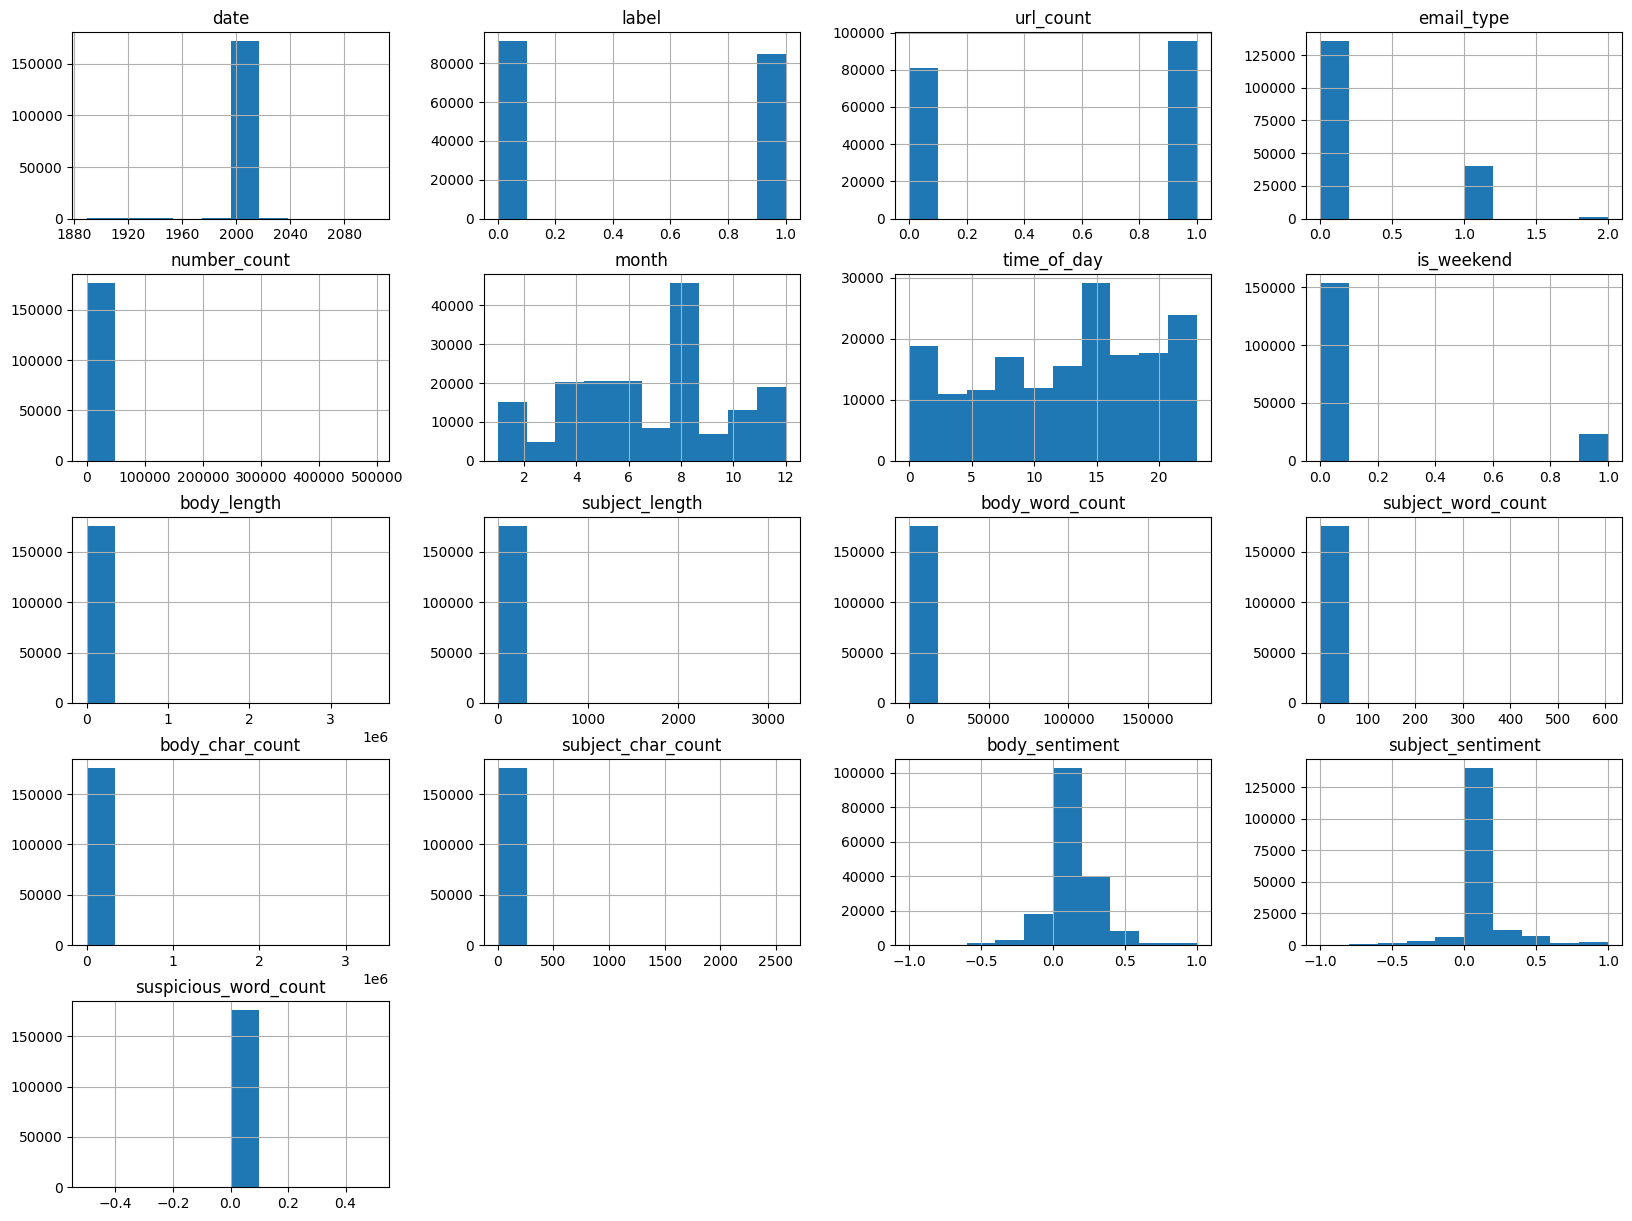

In [10]:
data.hist(figsize=(20,15))
plt.show()


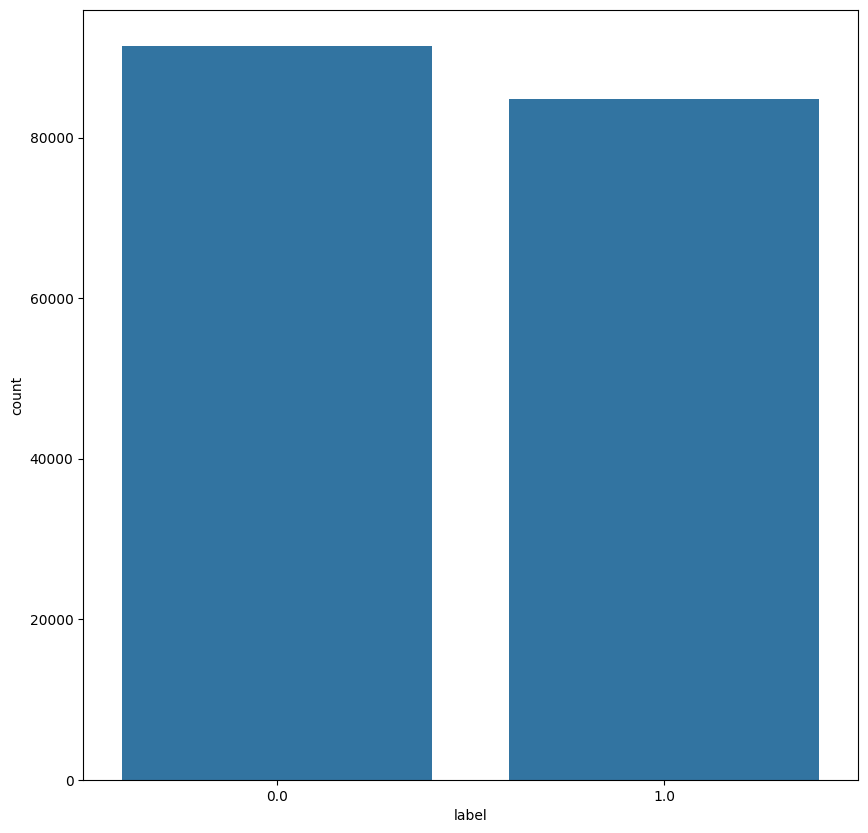

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(x ='label', data = data)
plt.show()

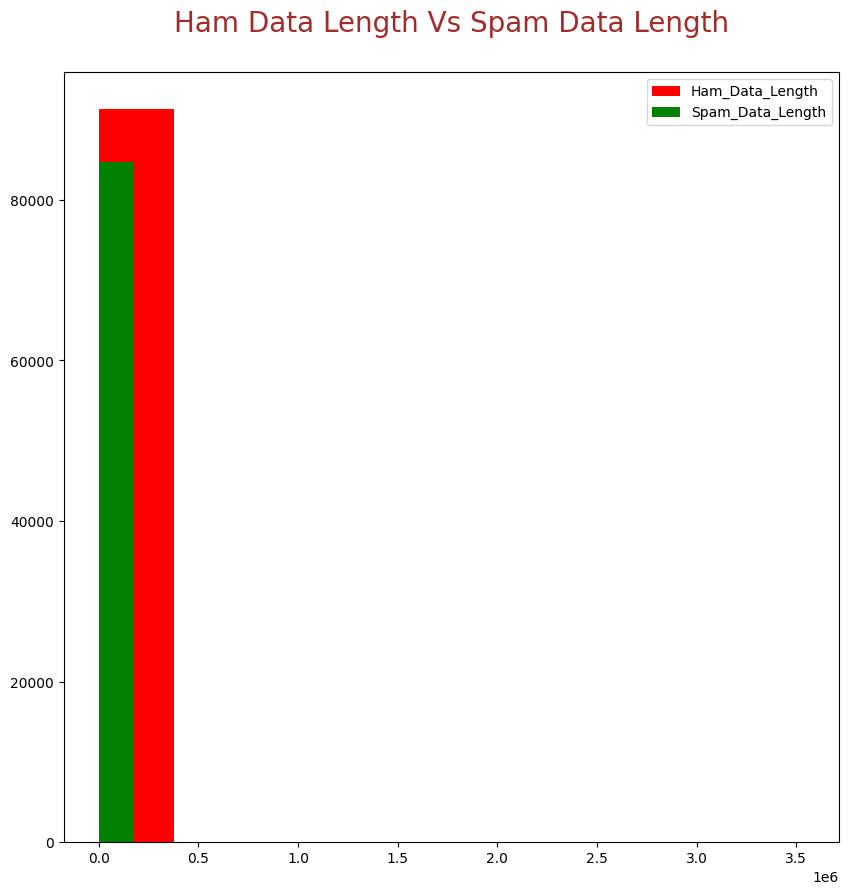

In [12]:
ham_data_len=data[data["label"]==0]["body"].str.len()
spam_data_len=data[data["label"]==1]["body"].str.len()
plt.figure(figsize=(10,10))
plt.hist(ham_data_len, bins=5,label='Ham_Data_Length',color="red")
plt.hist(spam_data_len , bins=20, label='Spam_Data_Length',color="green")
plt.title("Ham Data Length Vs Spam Data Length\n",fontsize=20,color="brown")
plt.legend()
plt.show()

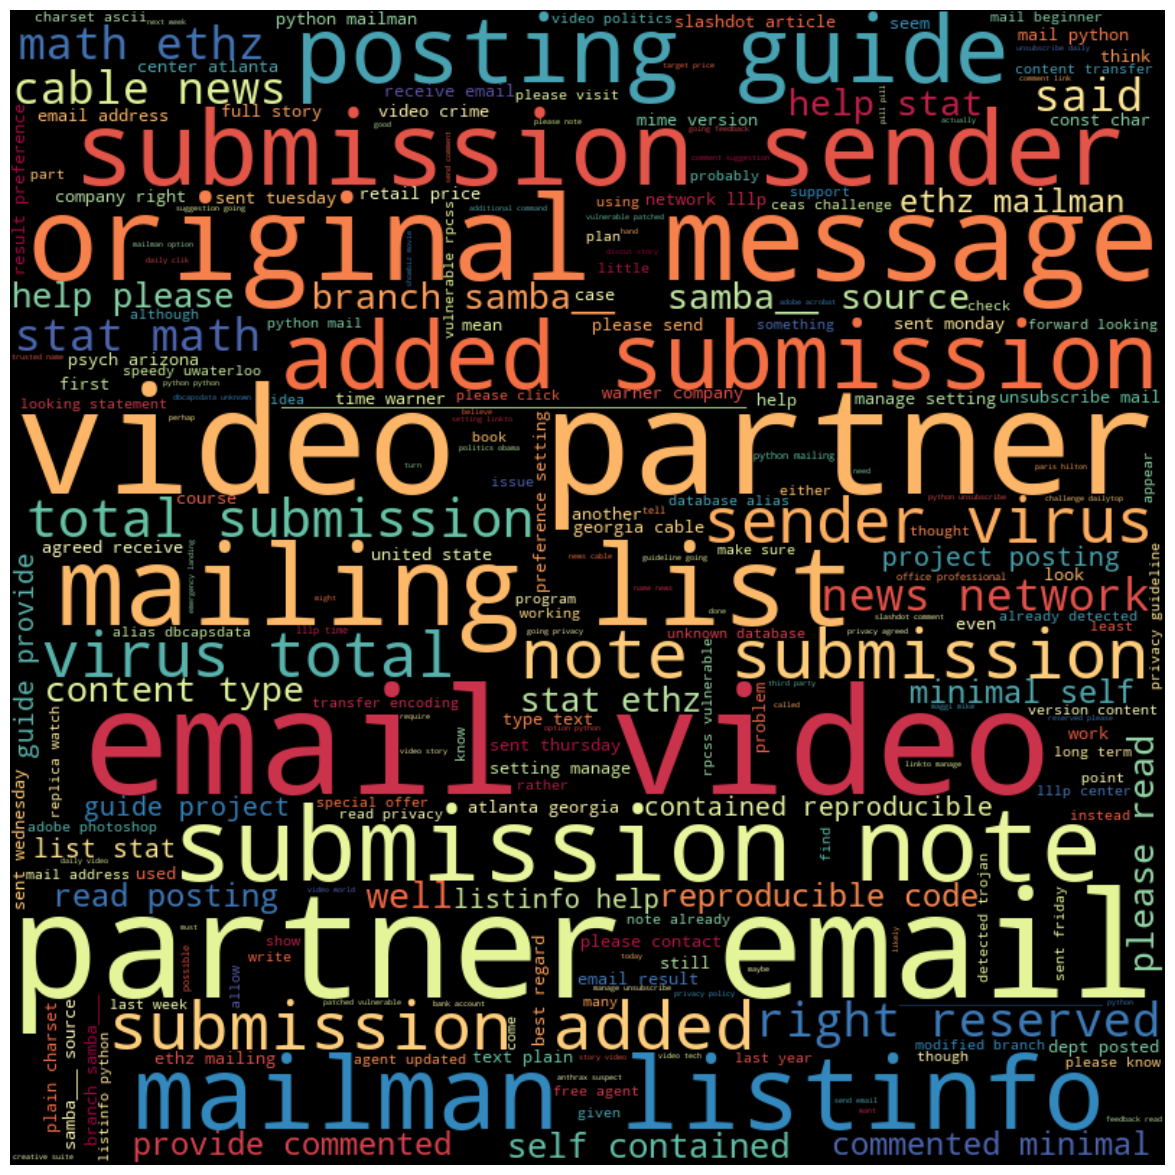

In [25]:
plt.figure(figsize=(15,15))

all_text=" ".join(data['body'].values.tolist())
all_text=" ".join([word.strip() for word in all_text.split() if len(word)>3])
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="Spectral").generate(all_text)
# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

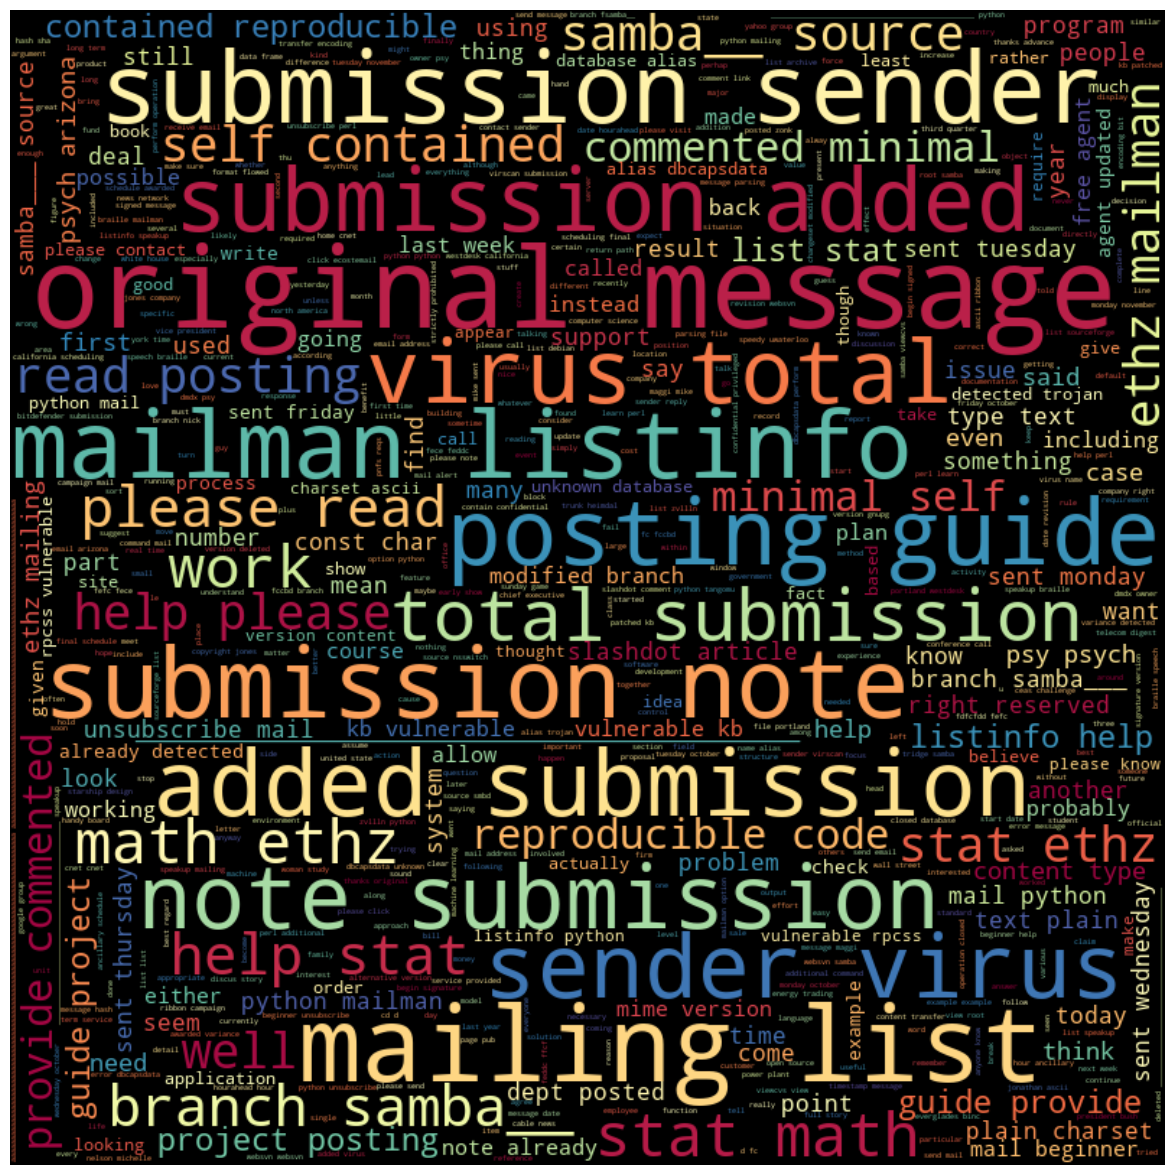

In [14]:
plt.figure(figsize=(15,15))
ham_data_wordcloud=data[data["label"]==0]
ham_text=" ".join(ham_data_wordcloud['body'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="Spectral").generate(ham_text)
# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

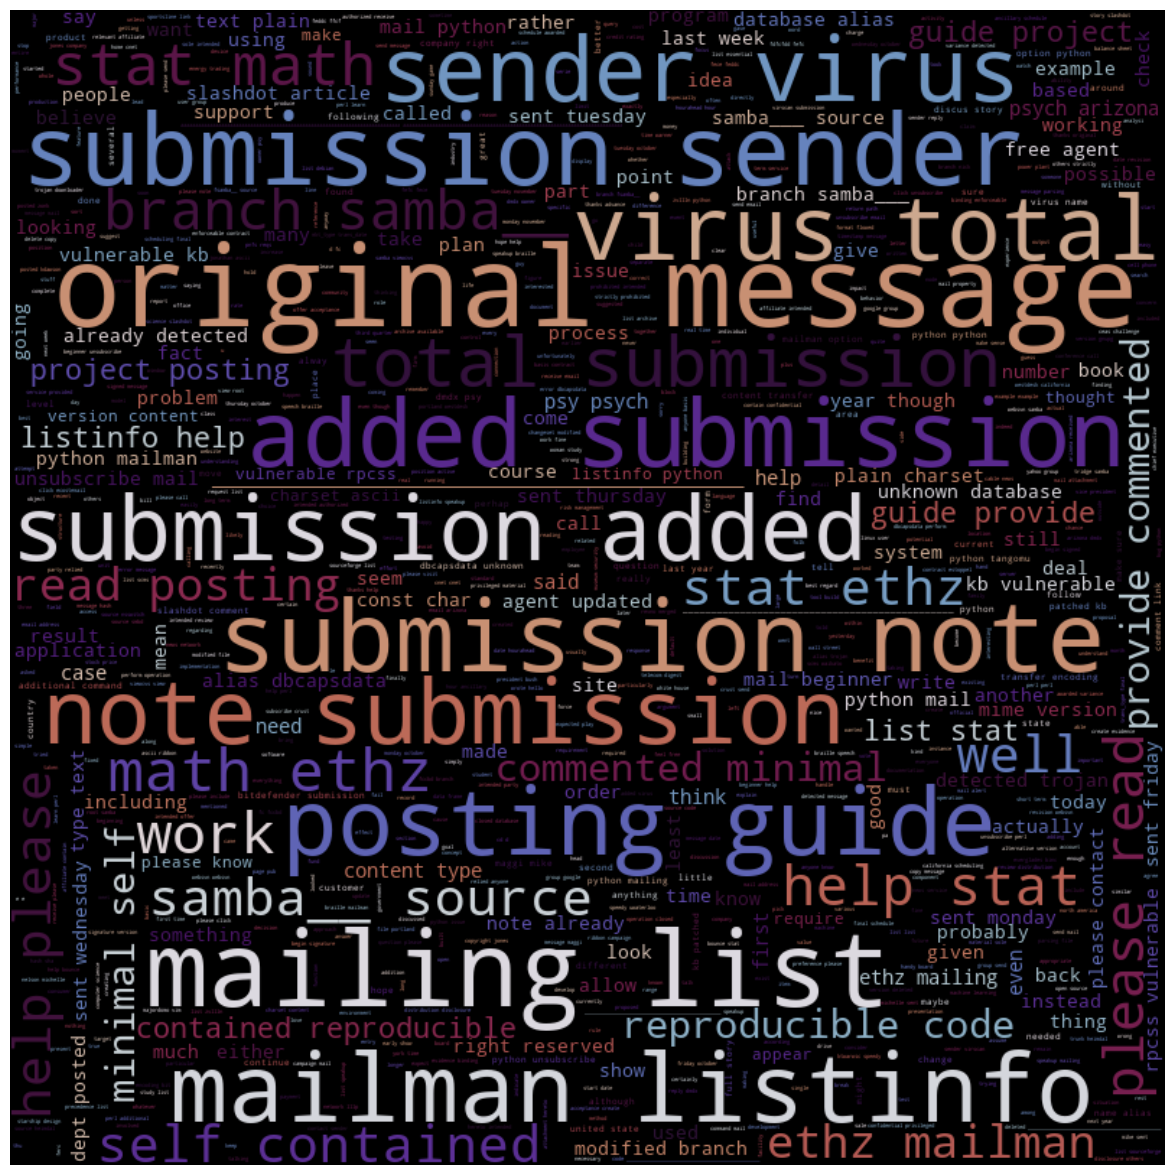

In [16]:
plt.figure(figsize=(15,15))
spam_data_wordcloud=data[data["label"]==1]
spam_text=" ".join(ham_data_wordcloud['body'].values.tolist())
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=800,colormap="twilight_shifted").generate(spam_text)
# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

C:\Users\tarik\AppData\Local\Temp\ipykernel_6400\4285851441.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="left",fontsize=15)


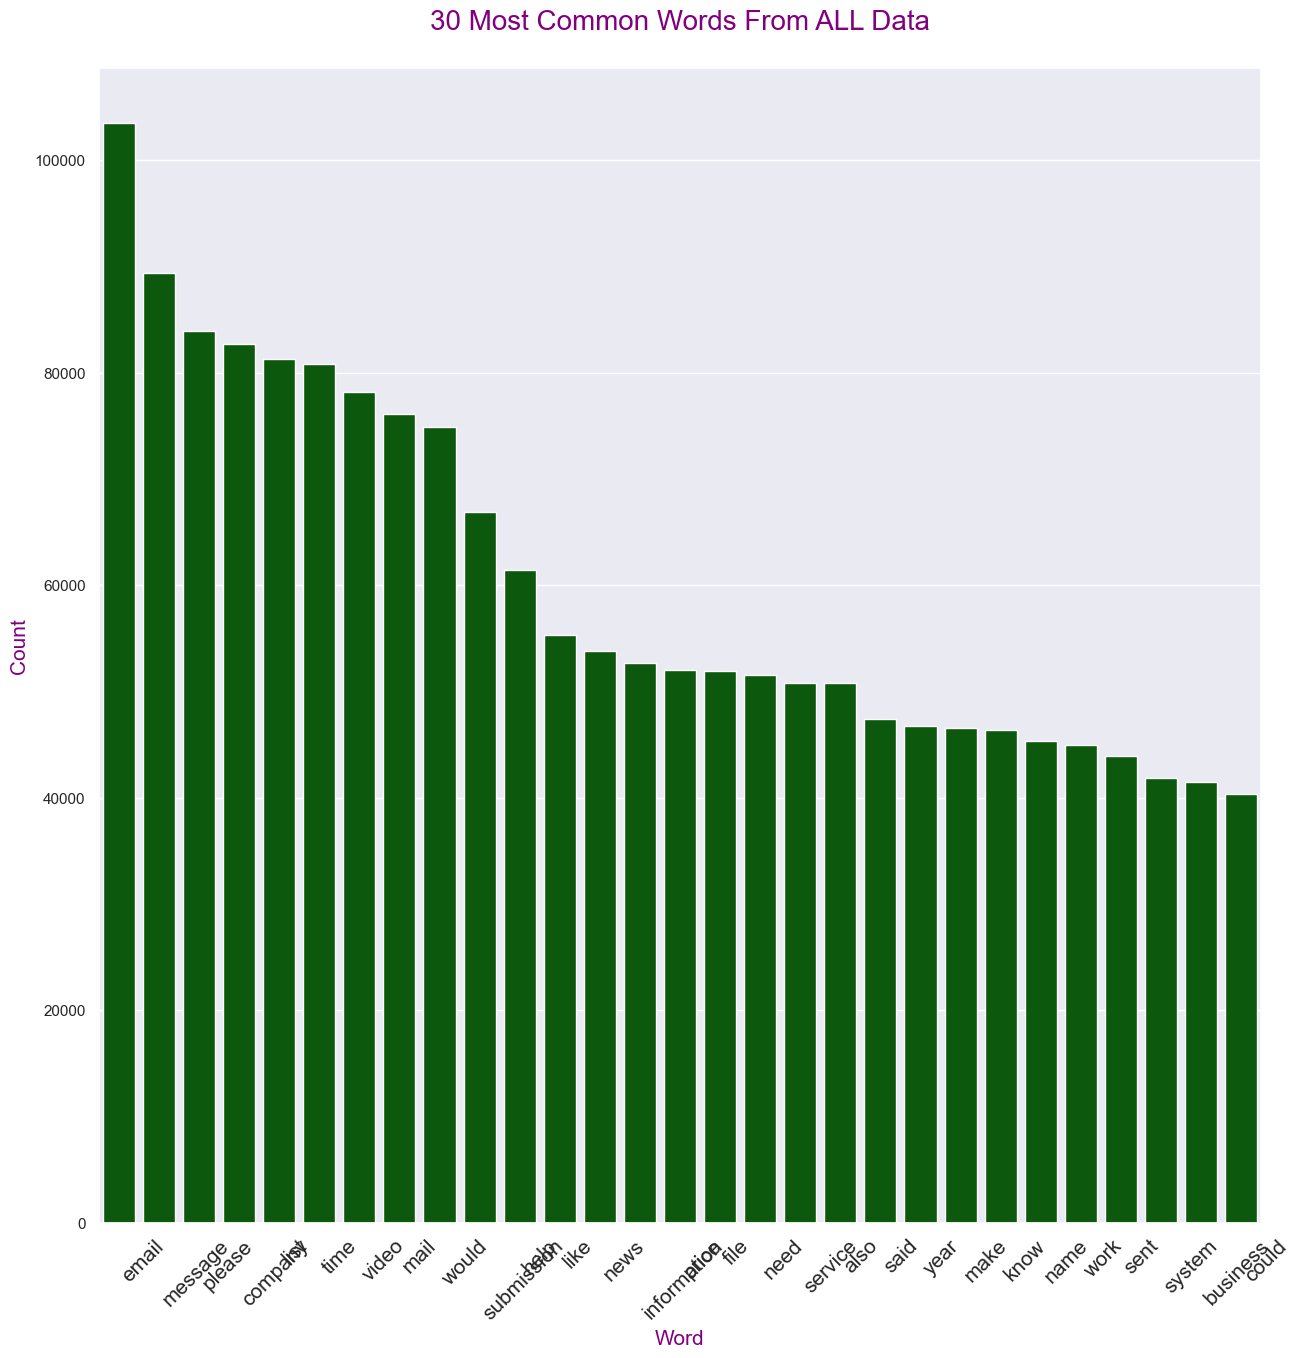

In [19]:
most_common_text=" ".join(data["body"].values.tolist())
most_common_text = most_common_text.translate(str.maketrans('', '', string.punctuation))
word_freq=most_common_text.split()
count_words=Counter(word_freq)
most_common_words=count_words.most_common(30)
most_common_words=[word for word in most_common_words if len(word[0])>3]
data_frame = pd.DataFrame(most_common_words, columns=['Word', 'Count'])
# plot the word counts using a barplot
sns.set(style="dark")
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.barplot(x="Word", y="Count", data=data_frame,color="darkgreen")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="left",fontsize=15)
plt.title("30 Most Common Words From ALL Data\n", fontsize=20,color="purple")
plt.xlabel("Word",fontsize=15,color="purple")
plt.ylabel("Count",fontsize=15,color="purple")

plt.show()

C:\Users\tarik\AppData\Local\Temp\ipykernel_6400\1450467391.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=15)


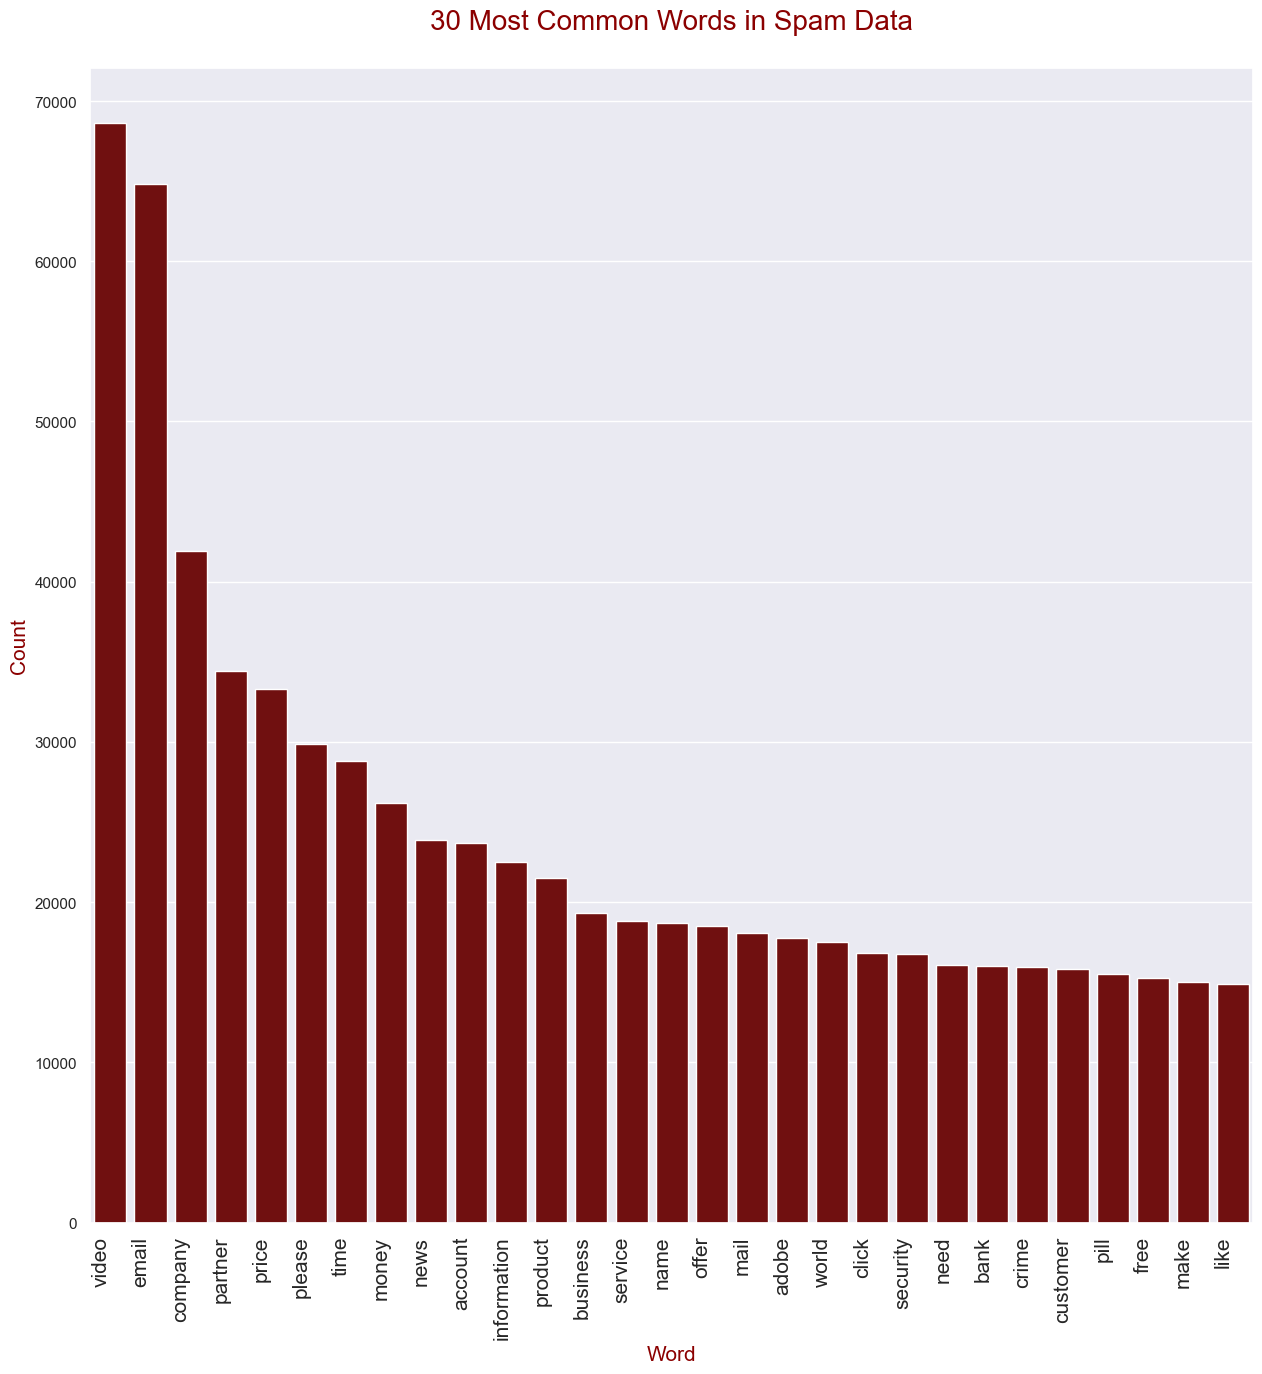

In [21]:
most_common_spam_word=data[data["label"]==1]
most_common_spam_text = " ".join(most_common_spam_word["body"].values.tolist())
most_common_spam_text = most_common_spam_text.translate(str.maketrans('', '', string.punctuation))
spam_word_freq = most_common_spam_text.split()
count_spam_words = Counter(spam_word_freq)
most_common_words_spam = count_spam_words.most_common(30)
most_common_words_spam = [word for word in most_common_words_spam if len(word[0])>3]
spam_data_frame = pd.DataFrame(most_common_words_spam, columns=['Word', 'Count'])
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.barplot(x="Word", y="Count", data=spam_data_frame, color="maroon")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=15)
plt.title("30 Most Common Words in Spam Data\n", fontsize=20, color="darkred")
plt.xlabel("Word", fontsize=15, color="darkred")
plt.ylabel("Count", fontsize=15, color="darkred")
plt.show()

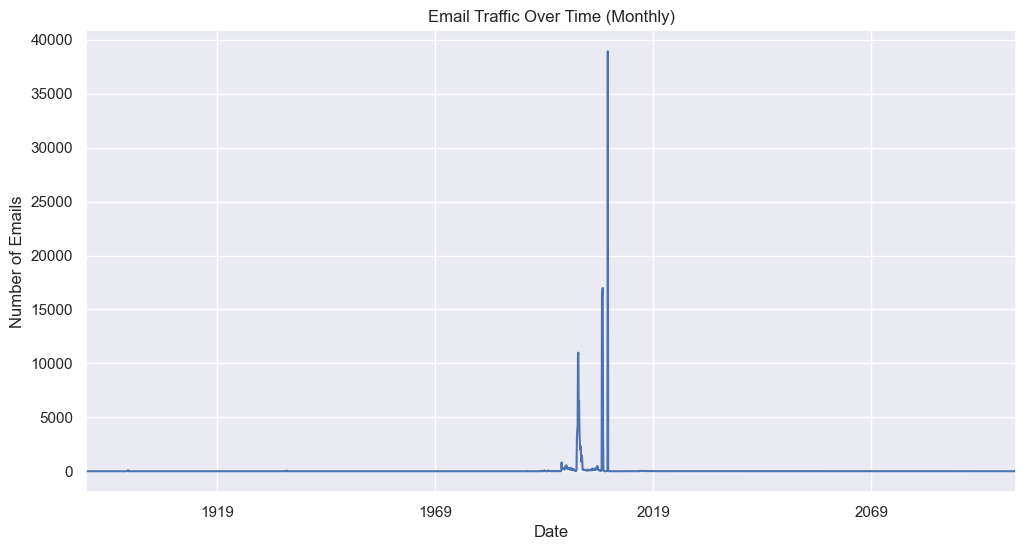

In [26]:
# Convert date to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resampling to monthly frequency
monthly_emails = data.resample('M').size()

plt.figure(figsize=(12,6))
monthly_emails.plot(title='Email Traffic Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.show()

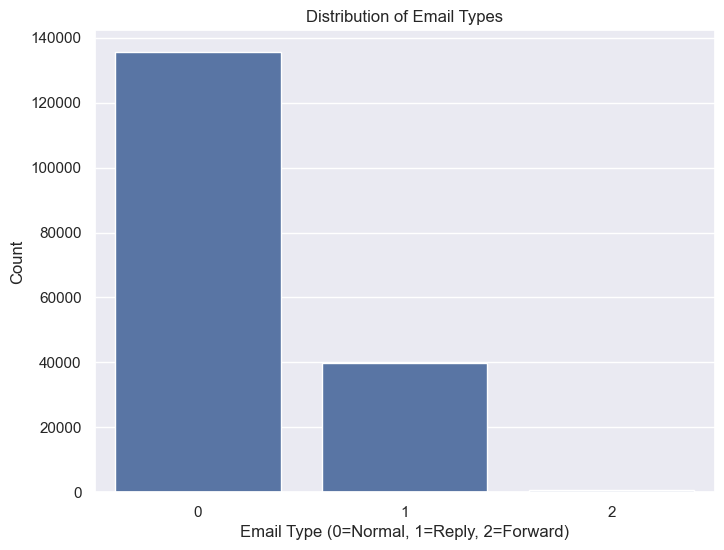

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='email_type', data=data)
plt.title('Distribution of Email Types')
plt.xlabel('Email Type (0=Normal, 1=Reply, 2=Forward)')
plt.ylabel('Count')
plt.show()

In [33]:
data['day_of_week'].fillna('unknown', inplace=True)

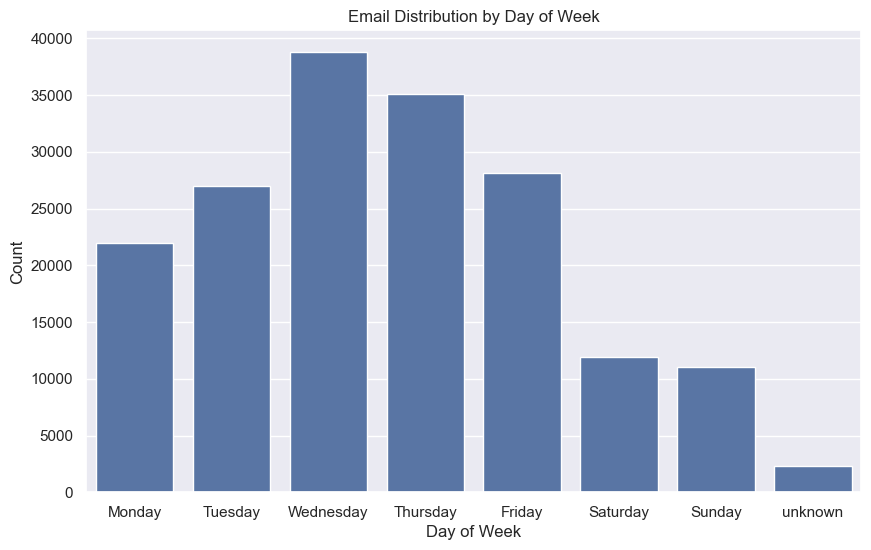

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'unknown'])
plt.title('Email Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

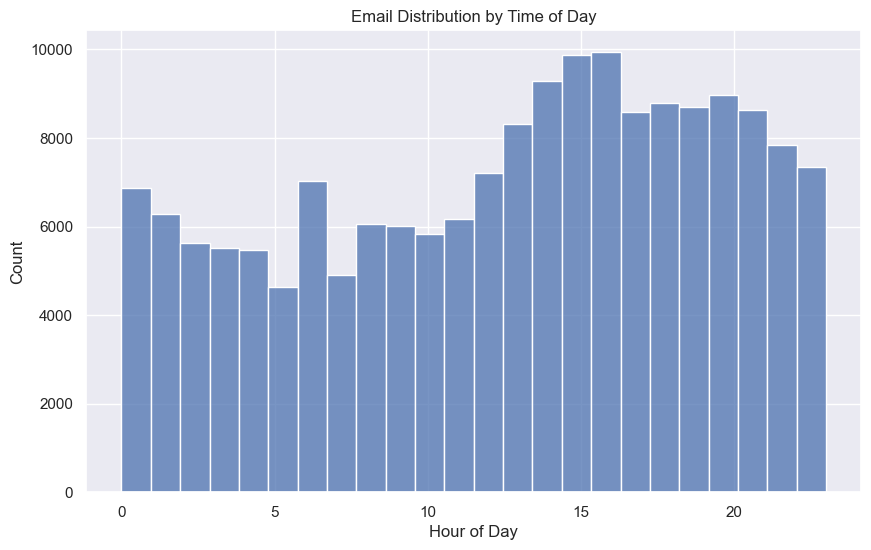

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(data['time_of_day'], bins=24, kde=False)
plt.title('Email Distribution by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

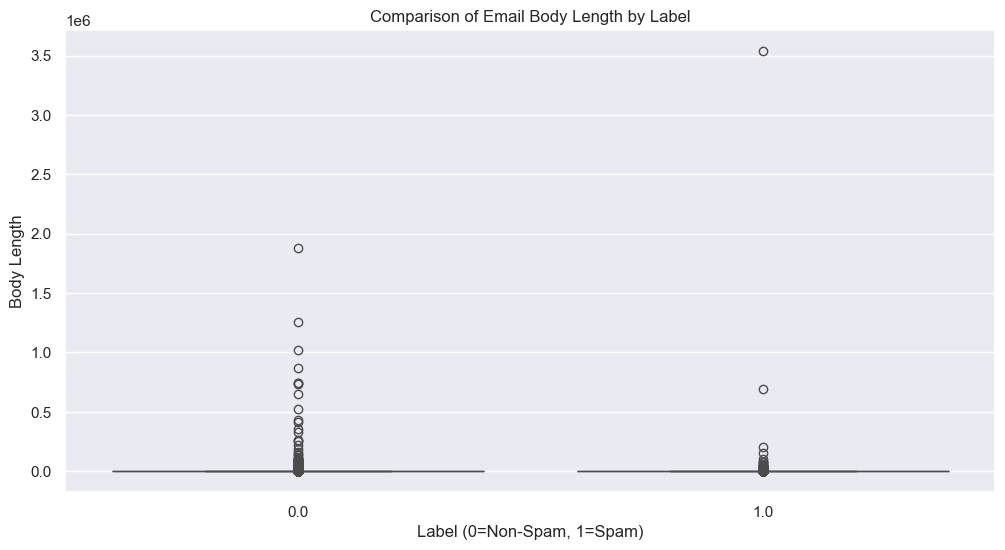

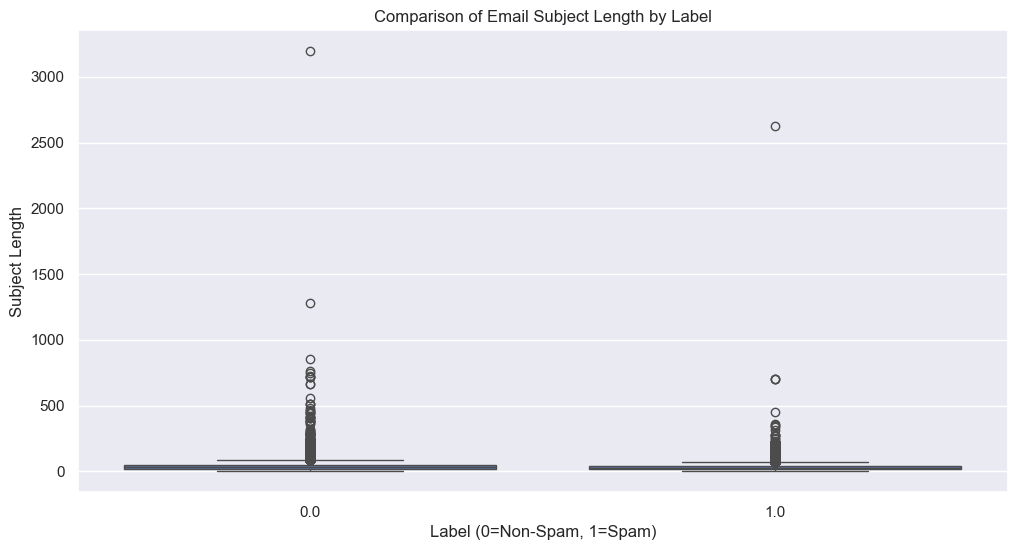

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x='label', y='body_length', data=data)
plt.title('Comparison of Email Body Length by Label')
plt.xlabel('Label (0=Non-Spam, 1=Spam)')
plt.ylabel('Body Length')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='label', y='subject_length', data=data)
plt.title('Comparison of Email Subject Length by Label')
plt.xlabel('Label (0=Non-Spam, 1=Spam)')
plt.ylabel('Subject Length')
plt.show()

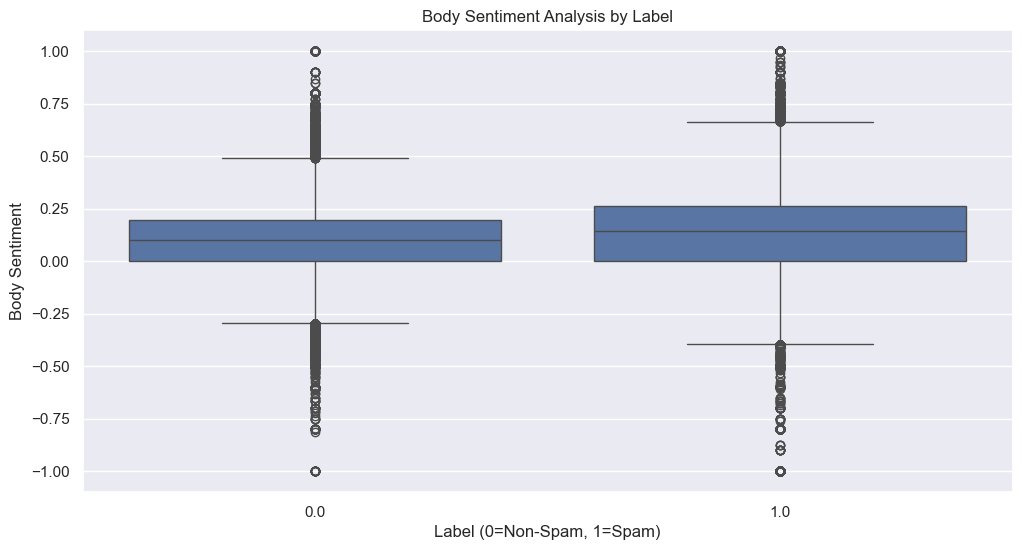

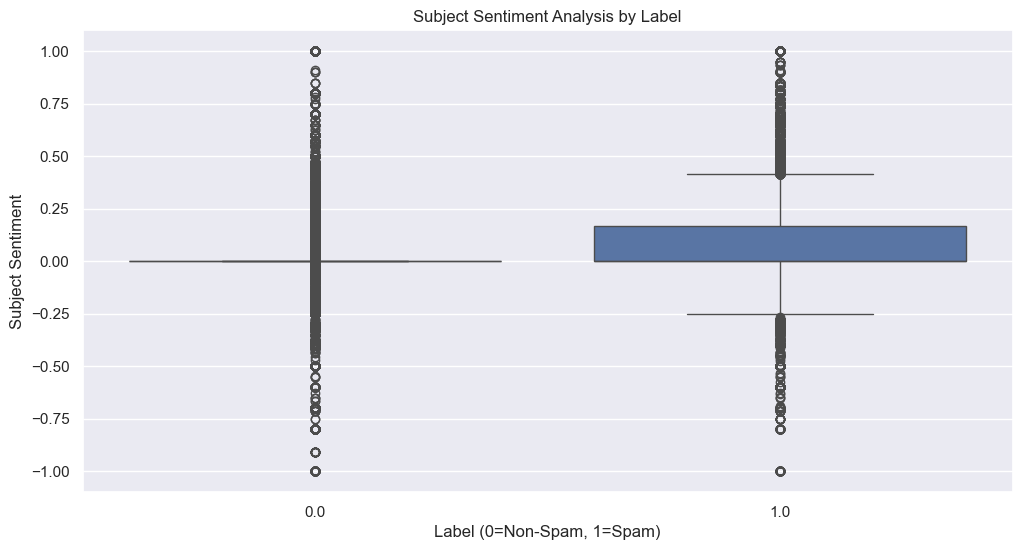

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x='label', y='body_sentiment', data=data)
plt.title('Body Sentiment Analysis by Label')
plt.xlabel('Label (0=Non-Spam, 1=Spam)')
plt.ylabel('Body Sentiment')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='label', y='subject_sentiment', data=data)
plt.title('Subject Sentiment Analysis by Label')
plt.xlabel('Label (0=Non-Spam, 1=Spam)')
plt.ylabel('Subject Sentiment')
plt.show()

In [41]:
numeric_data = data.select_dtypes(include=[np.number])

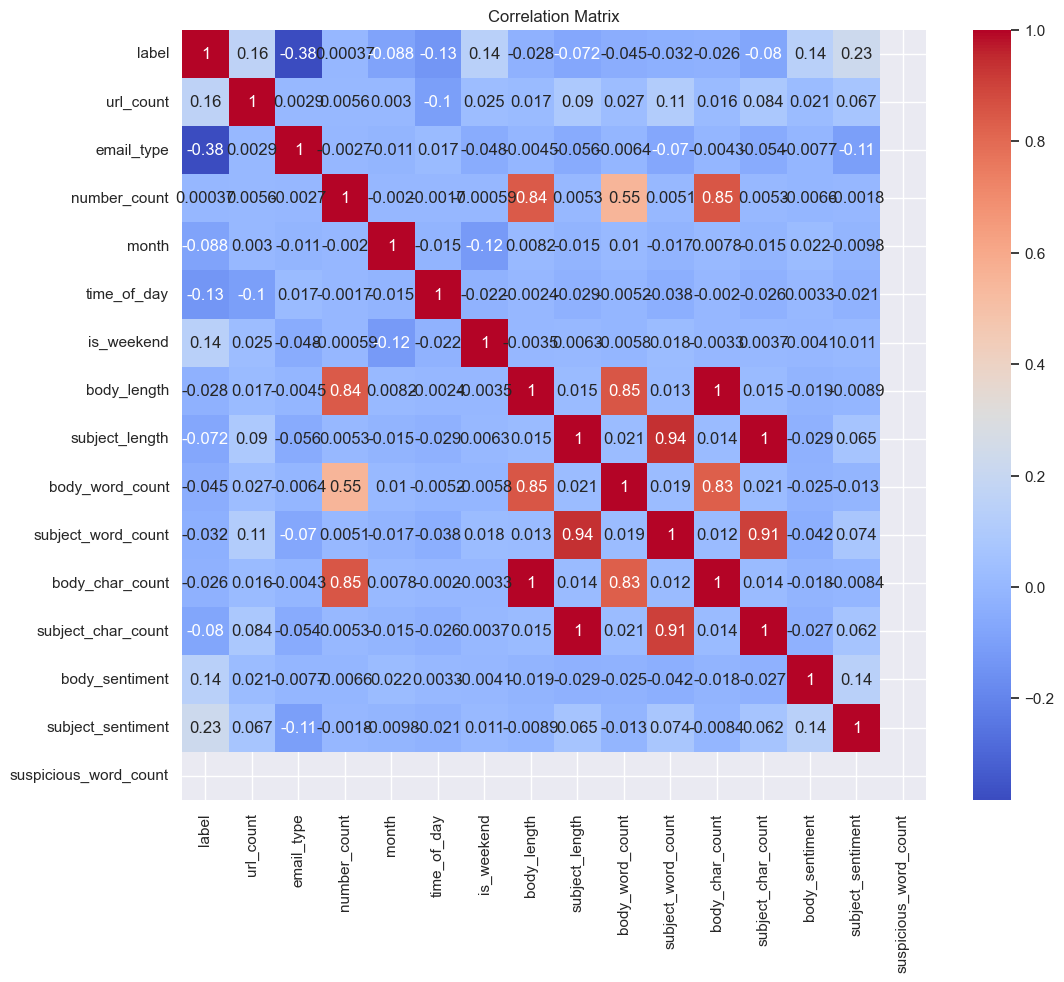

In [42]:
plt.figure(figsize=(12,10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [50]:
data['sender_mail'].replace(0, 'unknown', inplace=True)

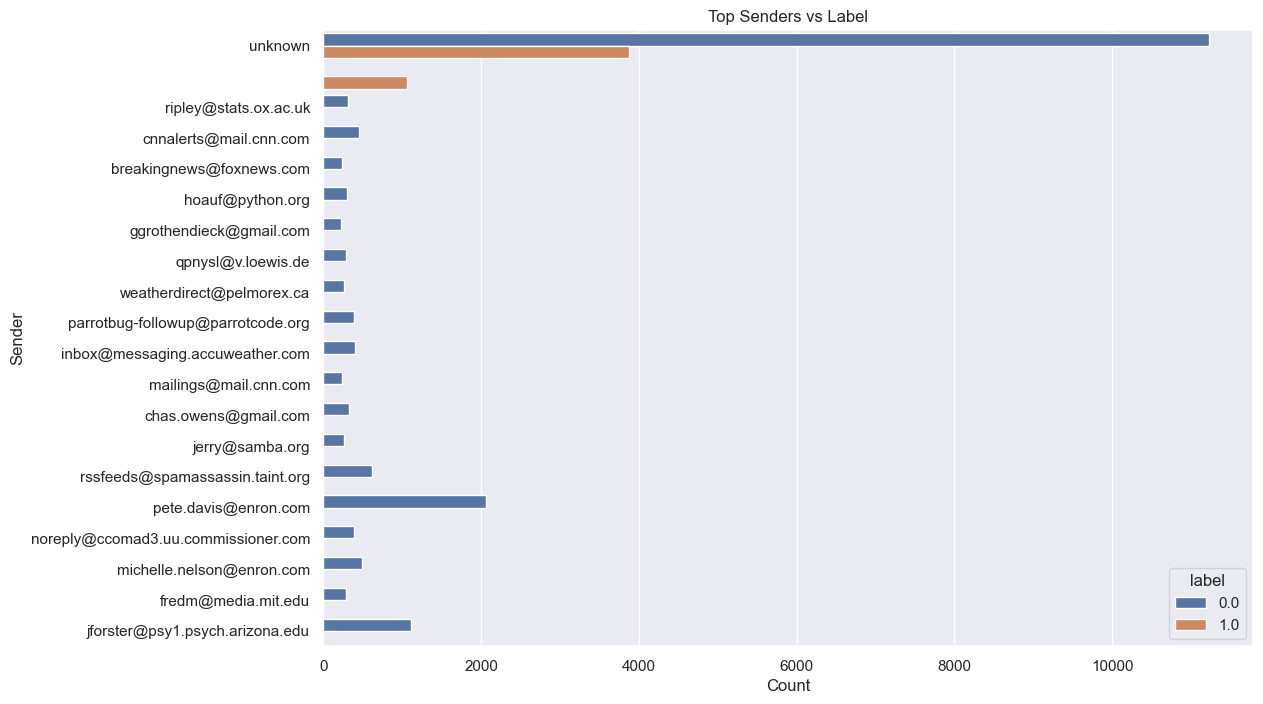

In [51]:
top_senders = data['sender_mail'].value_counts().head(20).index
filtered_data = data[data['sender_mail'].isin(top_senders)]

plt.figure(figsize=(12,8))
sns.countplot(y='sender_mail', hue='label', data=filtered_data)
plt.title('Top Senders vs Label')
plt.xlabel('Count')
plt.ylabel('Sender')
plt.show()

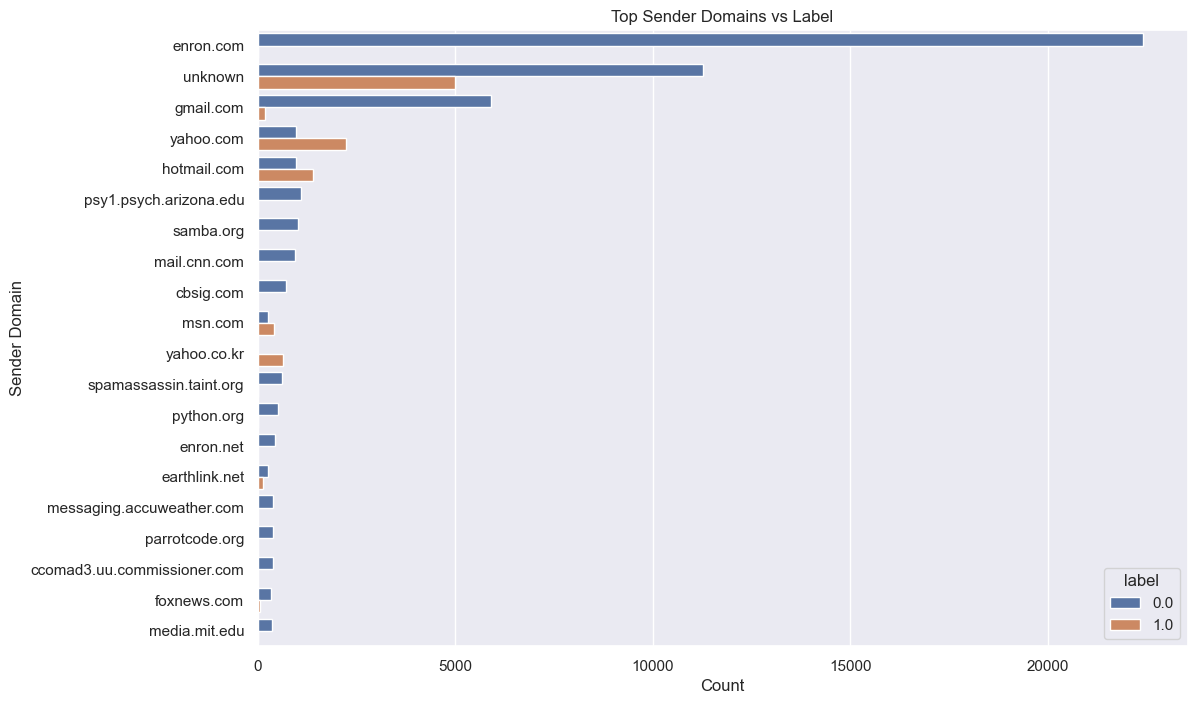

In [57]:
# Extract domain from sender email
data['sender_domain'] = data['sender_mail'].apply(lambda x: x.split('@')[1] if '@' in x else 'unknown')

# Get top domains
top_domains = data['sender_domain'].value_counts().head(20).index

# Filter data based on top domains
filtered_data = data[data['sender_domain'].isin(top_domains)]

# Plotting
plt.figure(figsize=(12,8))
sns.countplot(y='sender_domain', hue='label', data=filtered_data, order=top_domains)
plt.title('Top Sender Domains vs Label')
plt.xlabel('Count')
plt.ylabel('Sender Domain')
plt.show()